# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + weather_api_key + "&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name = city_weather["name"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | chimoio
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | uwayl
City not found. Skipping...
Processing Record 5 of Set 1 | fairmont
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | creston
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | mikkeli
Processing Record 11 of Set 1 | barcelos
Processing Record 12 of Set 1 | lasa
Processing Record 13 of Set 1 | coquimbo
Processing Record 14 of Set 1 | axim
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | las choapas
Processing Record 19 of Set 1 | grindavik
Processing Record 20 of Set 1 | north bend
Processing Record 21 of Set 1 | cayenne
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | chokurda

Processing Record 35 of Set 4 | dafeng
Processing Record 36 of Set 4 | naze
Processing Record 37 of Set 4 | kiunga
Processing Record 38 of Set 4 | tuatapere
Processing Record 39 of Set 4 | la asuncion
Processing Record 40 of Set 4 | kahului
Processing Record 41 of Set 4 | verkhnyaya inta
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | manzhouli
Processing Record 44 of Set 4 | avarua
Processing Record 45 of Set 4 | airai
Processing Record 46 of Set 4 | kaeo
Processing Record 47 of Set 4 | honiara
Processing Record 48 of Set 4 | emirdag
Processing Record 49 of Set 4 | bethel
Processing Record 0 of Set 5 | daru
Processing Record 1 of Set 5 | dingle
Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | mugur-aksy
Processing Record 4 of Set 5 | karasjok
Processing Record 5 of Set 5 | paragominas
Processing Record 6 of Set 5 | carnarvon
Processing Record 7 of Set 5 | ahipara
Processing Record 8 of Set 5 | creel
Processing Record 9 of Set 5 | white

Processing Record 23 of Set 8 | dalby
Processing Record 24 of Set 8 | hit
Processing Record 25 of Set 8 | allapalli
Processing Record 26 of Set 8 | general roca
Processing Record 27 of Set 8 | tonj
Processing Record 28 of Set 8 | havre-saint-pierre
Processing Record 29 of Set 8 | tiznit
Processing Record 30 of Set 8 | presidente olegario
Processing Record 31 of Set 8 | yar-sale
Processing Record 32 of Set 8 | kharsawan
Processing Record 33 of Set 8 | yate
Processing Record 34 of Set 8 | pontianak
Processing Record 35 of Set 8 | maltahohe
Processing Record 36 of Set 8 | chittaurgarh
Processing Record 37 of Set 8 | kaabong
Processing Record 38 of Set 8 | abha
Processing Record 39 of Set 8 | dolores
Processing Record 40 of Set 8 | cedar mill
Processing Record 41 of Set 8 | varhaug
Processing Record 42 of Set 8 | sioux lookout
Processing Record 43 of Set 8 | aleksandrovsk-sakhalinskiy
Processing Record 44 of Set 8 | quelimane
Processing Record 45 of Set 8 | konongo
Processing Record 46 of 

Processing Record 10 of Set 12 | manzil salim
Processing Record 11 of Set 12 | pontes e lacerda
Processing Record 12 of Set 12 | severomuysk
Processing Record 13 of Set 12 | fairbanks
Processing Record 14 of Set 12 | nouakchott
Processing Record 15 of Set 12 | sangmelima
Processing Record 16 of Set 12 | sola
Processing Record 17 of Set 12 | kibray
Processing Record 18 of Set 12 | rawson
Processing Record 19 of Set 12 | andenes
Processing Record 20 of Set 12 | tilichiki
Processing Record 21 of Set 12 | fallon
Processing Record 22 of Set 12 | bow island
Processing Record 23 of Set 12 | honghu
Processing Record 24 of Set 12 | klyuchevskiy
Processing Record 25 of Set 12 | melo
Processing Record 26 of Set 12 | gravelbourg
Processing Record 27 of Set 12 | azua
Processing Record 28 of Set 12 | maraa
Processing Record 29 of Set 12 | thohoyandou
Processing Record 30 of Set 12 | pakokku
Processing Record 31 of Set 12 | yajalon
Processing Record 32 of Set 12 | kadoma
Processing Record 33 of Set 1

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,22.63,45,0,5.47,AU,1674089617
1,Chimoio,-19.1164,33.4833,18.58,98,74,0.87,MZ,1674089618
2,Tiksi,71.6872,128.8694,-34.07,100,95,0.11,RU,1674089619
3,Fairmont,39.4851,-80.1426,6.33,90,100,0.77,US,1674089620
4,Vaini,-21.2000,-175.2000,31.09,70,75,3.60,TO,1674089621


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Busselton,-33.6500,115.3333,22.63,45,0,5.47,AU,1674089617
1,Chimoio,-19.1164,33.4833,18.58,98,74,0.87,MZ,1674089618
2,Tiksi,71.6872,128.8694,-34.07,100,95,0.11,RU,1674089619
3,Fairmont,39.4851,-80.1426,6.33,90,100,0.77,US,1674089620
4,Vaini,-21.2000,-175.2000,31.09,70,75,3.60,TO,1674089621


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

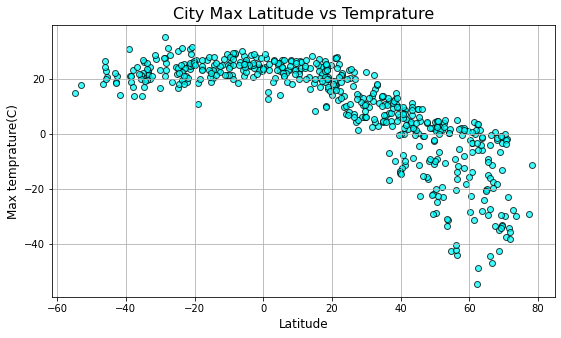

In [11]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,5))
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker = "o", facecolors="aqua", edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("City Max Latitude vs Temprature",fontsize=16)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Max temprature(C)",fontsize=12)
plt.grid()
# Save the figure
plt.savefig("../output_data/LatitudevsTemprature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

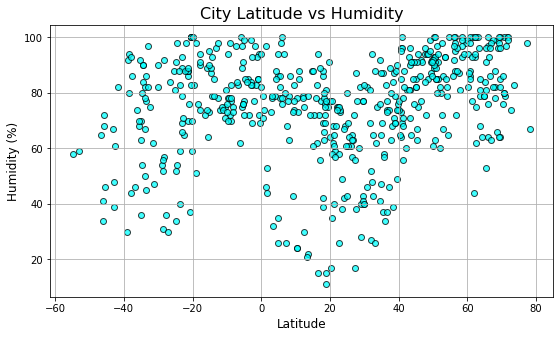

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,5))
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker = "o", facecolors="aqua", edgecolors="black",alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs Humidity",fontsize=16)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Humidity (%)",fontsize=12)
plt.grid()

# Save the figure
plt.savefig("../output_data/LatitudevsHumidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

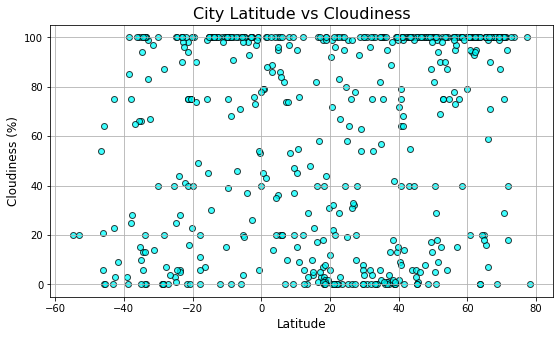

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,5))
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker = "o", facecolors="aqua", edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness",fontsize=16)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Cloudiness (%)",fontsize=12)
plt.grid()

# Save the figure
plt.savefig("../output_data/LatitudevsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

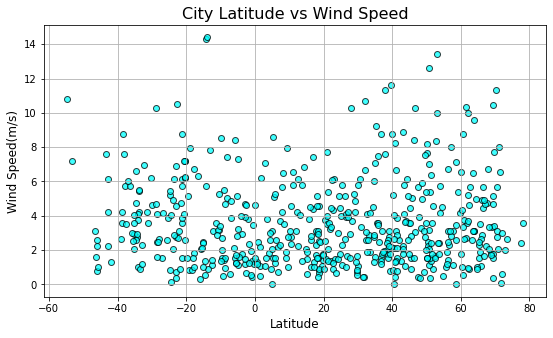

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,5))
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker = "o", facecolors="aqua", edgecolors="black",alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed",fontsize=16)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Wind Speed(m/s)",fontsize=12)
plt.grid()


# Save the figure
plt.savefig("../output_data/LatitudevsWindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Tiksi,71.6872,128.8694,-34.07,100,95,0.11,RU,1674089619
3,Fairmont,39.4851,-80.1426,6.33,90,100,0.77,US,1674089620
5,Creston,41.0586,-94.3614,-0.02,100,100,6.69,US,1674089622
6,Albany,42.6001,-73.9662,4.82,81,100,1.34,US,1674089623
8,Mikkeli,61.6886,27.2723,0.08,100,100,3.60,FI,1674089624


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]< 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Busselton,-33.6500,115.3333,22.63,45,0,5.47,AU,1674089617
1,Chimoio,-19.1164,33.4833,18.58,98,74,0.87,MZ,1674089618
4,Vaini,-21.2000,-175.2000,31.09,70,75,3.60,TO,1674089621
7,Hermanus,-34.4187,19.2345,20.45,90,13,2.76,ZA,1674089623
11,Coquimbo,-29.9533,-71.3436,16.85,82,40,4.63,CL,1674089470


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8182443808655969


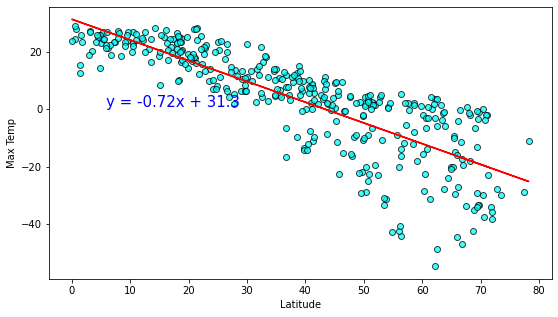

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.figure(figsize=(9,5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="blue")
plt.scatter(x_values,y_values, marker = "o", facecolors="aqua", edgecolors="black",alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.37354612706358203


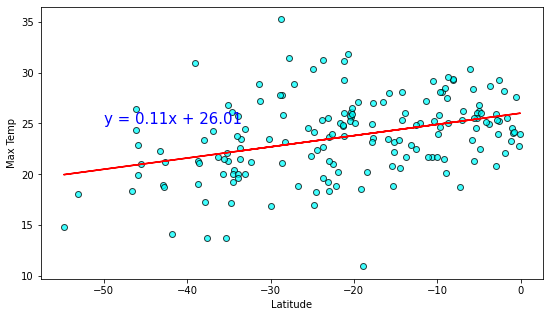

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.figure(figsize=(9,5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="blue")
plt.scatter(x_values,y_values, marker = "o", facecolors="aqua", edgecolors="black",alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 
The Max Temperature vs. Latitude plot for cities in the southern and northern hemisphere is shown above.
The Max Temp appears to show strong negative leinear relation with Latitude in northern hemisphere where as for southern hemisphere there is strong positive linear relation between Latitude and Max Temp.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.4299497334359384


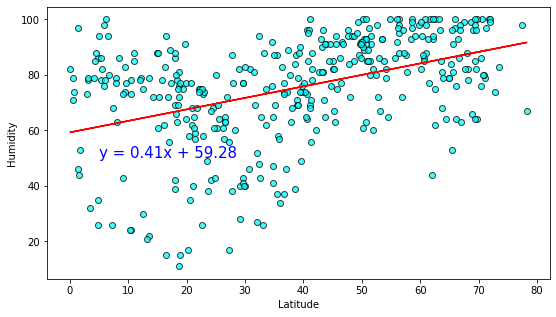

In [19]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.figure(figsize=(9,5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,50),fontsize=15,color="blue")
plt.scatter(x_values,y_values, marker = "o", facecolors="aqua", edgecolors="black",alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.41594148406834336


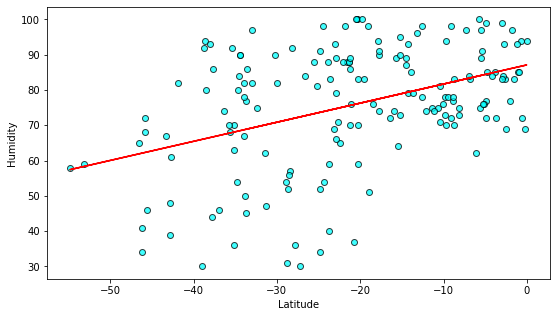

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.figure(figsize=(9,5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="blue")
plt.scatter(x_values,y_values, marker = "o", facecolors="aqua", edgecolors="black",alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 
The Humidity vs. Latitude plot for cities in the southern and northern hemisphere is shown above.
These graph shows moderate postive linear relation between Humidity and Latitiude for both northern and southern hemispehre.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.30903761435696747


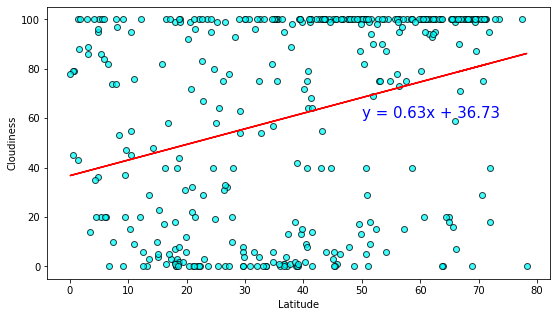

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.figure(figsize=(9,5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,60),fontsize=15,color="blue")
plt.scatter(x_values,y_values, marker = "o", facecolors="aqua", edgecolors="black",alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.36940020504020543


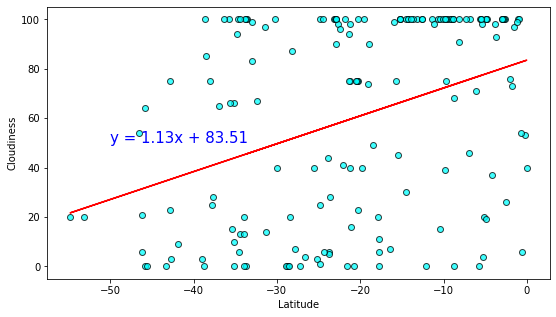

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.figure(figsize=(9,5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="blue")
plt.scatter(x_values,y_values, marker = "o", facecolors="aqua", edgecolors="black",alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 
The Cloudiness vs. Latitude plot for cities in the southern and northern hemisphere is shown above.
The data seems to show no linear relationship between Cloudiness and Latitude for both northern and southern hemisphere. Data is very much scattred for cloudiness over the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.11553433663579986


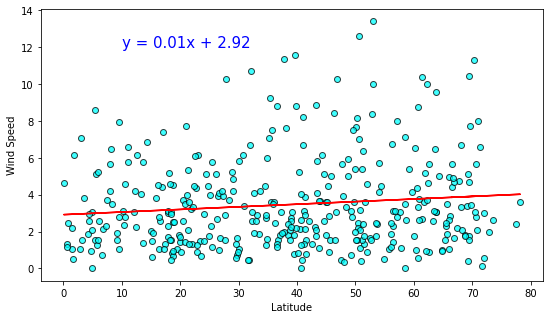

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.figure(figsize=(9,5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="blue")
plt.scatter(x_values,y_values, marker = "o", facecolors="aqua", edgecolors="black",alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.1815238617892529


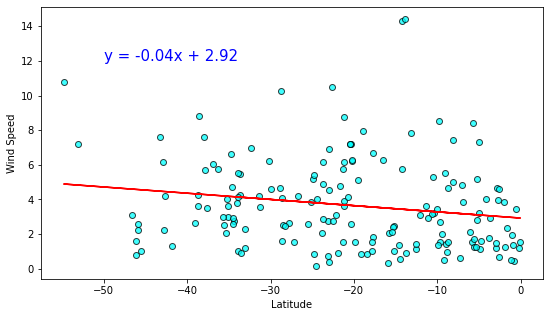

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.figure(figsize=(9,5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="blue")
plt.scatter(x_values,y_values, marker = "o", facecolors="aqua", edgecolors="black",alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 
The Wind Speed vs. Latitude plot for cities in the southern and northern hemisphere is shown above.
Data seems to show no relationship for northern hemisphere, whereas for southerns hemisphere there is a weak negative corelation between wind speed and latitude.